In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
plt.style.use("seaborn")
import numpy as np
import seaborn as sns 

In [70]:
# Using Jupyter-lab: load a excel multitabbed excell xlsx file
workbook_url = 'https://github.com/microsoft/powerbi-desktop-samples/blob/main/AdventureWorks%20Sales%20Sample/AdventureWorks%20Sales.xlsx?raw=true'
#single_df = pd.read_excel(workbook_url, sheet_name='Sales_data')
all_dfs = pd.read_excel(workbook_url, sheet_name=None) # return all in a collections.OrderedDict
indice = all_dfs.keys() # return  the dictionary keys names 
print(indice)

dict_keys(['Sales Order_data', 'Sales Territory_data', 'Sales_data', 'Reseller_data', 'Date_data', 'Product_data', 'Customer_data'])


In [71]:
# valores = all_dfs.values()
# print(valores)

In [72]:
for k in all_dfs:
    print("------------------------------------------------")
    print(k)
    print("------------------------------------------------")
    print(all_dfs[k].head())

------------------------------------------------
Sales Order_data
------------------------------------------------
    Channel  SalesOrderLineKey Sales Order Sales Order Line
0  Reseller           43659001     SO43659      SO43659 - 1
1  Reseller           43659002     SO43659      SO43659 - 2
2  Reseller           43659003     SO43659      SO43659 - 3
3  Reseller           43659004     SO43659      SO43659 - 4
4  Reseller           43659005     SO43659      SO43659 - 5
------------------------------------------------
Sales Territory_data
------------------------------------------------
   SalesTerritoryKey     Region        Country          Group
0                  1  Northwest  United States  North America
1                  2  Northeast  United States  North America
2                  3    Central  United States  North America
3                  4  Southwest  United States  North America
4                  5  Southeast  United States  North America
----------------------------------

In [73]:
indice

dict_keys(['Sales Order_data', 'Sales Territory_data', 'Sales_data', 'Reseller_data', 'Date_data', 'Product_data', 'Customer_data'])

In [74]:
dfSales = all_dfs['Sales_data']
dfSalesOrder = all_dfs['Sales Order_data']
dfSalesTerritory = all_dfs['Sales Territory_data']
dfReseller = all_dfs['Reseller_data']
dfDate = all_dfs['Date_data']
dfProduct = all_dfs['Product_data']
dfCustomer = all_dfs['Customer_data']
#dfSalesOrder.head()

In [75]:
# inner join
dfnew = dfSales.merge(dfReseller, on=['ResellerKey'], how='inner').drop(['ResellerKey', 'Business Type', 'Postal Code', 'Reseller ID'], axis=1)

In [76]:
# put here 'cause formating date on every fields can take long time
dfnew['OrderDateKey'] = dfnew['OrderDateKey'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
dfnew['DueDateKey'] = dfnew['DueDateKey'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
dfnew['ShipDateKey'] = dfnew['ShipDateKey'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
dfnew = dfnew.rename(columns = {'OrderDateKey': "Data-Pedido", 'DueDateKey':'Data-Entrega', 'ShipDateKey':'Data-Envio'}, inplace = False)


In [77]:
# translating Columns names to my native language
dfnew = dfnew.rename(columns = {'Reseller':'Revendedor', 'City':'Cidade-Venda', 'State-Province': 'Estado-Venda', 'Country-Region':'Pais-Venda'}, inplace = False)
# and go on ...
dfnew = dfnew.merge(dfSalesOrder, on=['SalesOrderLineKey'], how='inner').drop(['SalesOrderLineKey', 'Sales Order', 'Sales Order Line'], axis=1)
dfnew = dfnew.rename(columns = {'Channel': "Canal de Venda"}, inplace = False)
dfnew = dfnew.merge(dfCustomer, on=['CustomerKey'], how='inner').drop(['CustomerKey', 'Customer ID', 'Postal Code' ], axis=1)
dfnew = dfnew.rename(columns = {'Customer': "Cliente", 'City':'Cidade-Venda', 'State-Province':'Estado-Venda', 'Country-Region':'Pais-Venda'}, inplace = False)
dfnew = dfnew.merge(dfProduct, on=['ProductKey'], how='inner').drop(['ProductKey', 'SKU', 'Standard Cost'], axis=1)
dfnew = dfnew.rename(columns = {'Product': "Produto", 'Color':'Cor', 'List Price':'Preço Listado', 'Model':'Modelo', 'Subcategory':'Sub-Categoria', 'Category':'Categoria'}, inplace = False)
dfnew = dfnew.merge(dfSalesTerritory, on=['SalesTerritoryKey'], how='inner').drop(['SalesTerritoryKey'], axis=1)
dfnew = dfnew.rename(columns = {'Region': "Regional", 'Country':'Setor', 'Group':'Grupo'}, inplace = False)
dfnew = dfnew.rename(columns = {'Order Quantity':'Qtd. da Ordem', 'Unit Price':'Preço Unitário', 'Extended Amount':'Preço Total/Extendido', 'Unit Price Discount Pct':'Porcentagem de desconto de preço unitário', 'Product Standard Cost':'Custo Padrão do Produto', 'Total Product Cost':'Custo Total do Produto', 'Sales Amount':'Total de vendas'}, inplace = False)

# dfnew['List Price'].equals(dfnew['Extended Amount'])
dfnew.tail()

,Data-Pedido,Data-Entrega,Data-Envio,Qtd. da Ordem,Preço Unitário,Preço Total/Extendido,Porcentagem de desconto de preço unitário,Custo Padrão do Produto,Custo Total do Produto,Total de vendas,...,Pais-Venda,Produto,Cor,Preço Listado,Modelo,Sub-Categoria,Categoria,Regional,Setor,Grupo
121248,2020-05-27,2020-06-06,2020-06-03,1,49.99,49.99,0,38.4923,38.4923,49.99,...,United Kingdom,"Long-Sleeve Logo Jersey, S",Multi,49.99,Long-Sleeve Logo Jersey,Jerseys,Clothing,United Kingdom,United Kingdom,Europe
121249,2020-06-05,2020-06-15,2020-06-12,1,49.99,49.99,0,38.4923,38.4923,49.99,...,United Kingdom,"Long-Sleeve Logo Jersey, S",Multi,49.99,Long-Sleeve Logo Jersey,Jerseys,Clothing,United Kingdom,United Kingdom,Europe
121250,2020-06-08,2020-06-18,2020-06-15,1,49.99,49.99,0,38.4923,38.4923,49.99,...,United Kingdom,"Long-Sleeve Logo Jersey, S",Multi,49.99,Long-Sleeve Logo Jersey,Jerseys,Clothing,United Kingdom,United Kingdom,Europe
121251,2020-06-10,2020-06-20,NaT,1,49.99,49.99,0,38.4923,38.4923,49.99,...,United Kingdom,"Long-Sleeve Logo Jersey, S",Multi,49.99,Long-Sleeve Logo Jersey,Jerseys,Clothing,United Kingdom,United Kingdom,Europe
121252,2020-06-15,2020-06-25,NaT,1,49.99,49.99,0,38.4923,38.4923,49.99,...,United Kingdom,"Long-Sleeve Logo Jersey, S",Multi,49.99,Long-Sleeve Logo Jersey,Jerseys,Clothing,United Kingdom,United Kingdom,Europe


In [78]:
dfnew['Tempo Envio /Logística'] = (dfnew['Data-Entrega'] - dfnew['Data-Envio']).dt.days
dfnew['Tempo Envio/Preparação'] = (dfnew['Data-Envio'] - dfnew['Data-Pedido']).dt.days
dfnew['Tempo Envio/Total'] = (dfnew['Data-Entrega'] - dfnew['Data-Pedido'] ).dt.days
dfnew['Lucro']  = dfnew['Preço Total/Extendido'] - dfnew['Custo Total do Produto']
dfnew.head(4)

,Data-Pedido,Data-Entrega,Data-Envio,Qtd. da Ordem,Preço Unitário,Preço Total/Extendido,Porcentagem de desconto de preço unitário,Custo Padrão do Produto,Custo Total do Produto,Total de vendas,...,Modelo,Sub-Categoria,Categoria,Regional,Setor,Grupo,Tempo Envio /Logística,Tempo Envio/Preparação,Tempo Envio/Total,Lucro
0,2017-07-02,2017-07-12,2017-07-09,1,2024.994,2024.994,0,1898.0944,1898.0944,2024.994,...,Mountain-100,Mountain Bikes,Bikes,Southeast,United States,North America,3.0,7.0,10,126.8996
1,2018-01-19,2018-01-29,2018-01-26,2,2024.994,4049.988,0,1898.0944,3796.1888,4049.988,...,Mountain-100,Mountain Bikes,Bikes,Southeast,United States,North America,3.0,7.0,10,253.7992
2,2017-07-17,2017-07-27,2017-07-24,2,2024.994,4049.988,0,1898.0944,3796.1888,4049.988,...,Mountain-100,Mountain Bikes,Bikes,Southeast,United States,North America,3.0,7.0,10,253.7992
3,2017-09-24,2017-10-04,2017-10-01,1,2024.994,2024.994,0,1898.0944,1898.0944,2024.994,...,Mountain-100,Mountain Bikes,Bikes,Southeast,United States,North America,3.0,7.0,10,126.8996


In [79]:
# auxiliar function to check if has  columns with same content
#dfnew['Product Standard Cost'].equals(dfnew['Standard Cost'])
#dfnew['Extended Amount'].equals(dfnew['List Price'])
#print(dfnew['Unit Price'].sum())
#print(dfnew['Extended Amount'].sum())
#print(dfnew['List Price'].sum())
#print(dfnew['Unit Price'].sum())
# dfnew.head()

# CUSTO TOTAL
round(dfnew["Custo Total do Produto"].sum(), 2)

97257907.95

In [80]:
# VENDAS POR REGIÃO
dfnew.groupby("Regional")['Total de vendas'].sum()

Regional
Australia         1.065534e+07
Canada            1.635577e+07
Central           7.909009e+06
France            7.251556e+06
Germany           4.878300e+06
Northeast         6.939374e+06
Northwest         1.608494e+07
Southeast         7.879655e+06
Southwest         2.418461e+07
United Kingdom    7.670721e+06
Name: Total de vendas, dtype: float64

In [81]:
#for key, value in all_dfs.items():
#    print(key, "----------------------------\n", value)
# MÉDIA DO PRAZO DE ENTREGA POR CATEGORIA DE PRODUTO
#dfnew.groupby("Categoria")["Tempo Envio/Total"].mean()
#pd.options.display.float_format() = '{ :20, .2f}'.format

# LUCRO ANUAL POR GRUPO
lucro_ano = dfnew.groupby([dfnew['Data-Pedido'].dt.year, "Grupo"])['Lucro'].sum().reset_index()
lucro_ano

,Data-Pedido,Grupo,Lucro
0,2017,Europe,3.312343e+05
1,2017,North America,9.347157e+05
2,2017,Pacific,6.192303e+05
3,2018,Europe,7.468381e+05
4,2018,North America,1.483530e+06
5,2018,Pacific,8.677101e+05
6,2019,Europe,1.404323e+06
7,2019,North America,1.912655e+06
8,2019,Pacific,1.255966e+06
9,2020,Europe,1.142036e+06


In [82]:
dfnew.groupby([dfnew['Data-Pedido'].dt.year, "Grupo"])['Total de vendas'].sum().round(2)

Data-Pedido  Grupo        
2017         Europe             823566.92
             North America     9572832.29
             Pacific           1532156.31
2018         Europe            3353406.61
             North America    25046071.18
             Pacific           2117414.00
2019         Europe            9294578.48
             North America    29513948.57
             Pacific           4086582.45
2020         Europe            6329025.05
             North America    15220509.14
             Pacific           2919183.20
Name: Total de vendas, dtype: float64

In [83]:
# TOTAL DE PRODUTOS VENDIDOS
dfnew.groupby('Produto')['Qtd. da Ordem'].sum().sort_values(ascending=False)

Produto
AWC Logo Cap                        8311
Water Bottle - 30 oz.               6815
Sport-100 Helmet, Blue              6743
Long-Sleeve Logo Jersey, L          6592
Sport-100 Helmet, Black             6532
                                    ... 
LL Touring Frame - Blue, 62           15
LL Road Seat/Saddle                   10
LL Mountain Frame - Black, 40          8
ML Mountain Frame-W - Silver, 38       7
LL Touring Frame - Blue, 58            4
Name: Qtd. da Ordem, Length: 266, dtype: int64

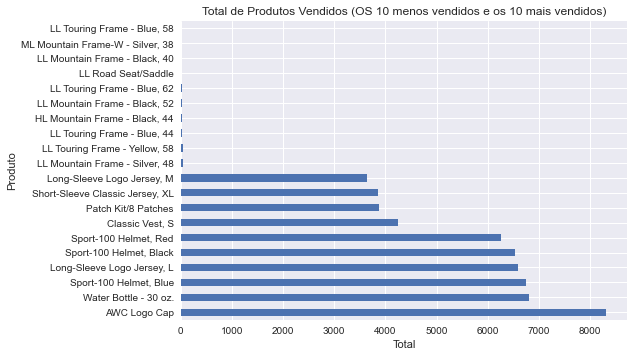

In [84]:
# GRÁFICO DO TOTAL DE PRODUTOS VENDIDOS
# OS 10 MAIS VENDIDOS E OS  10 MENOS VENDIDOS
dfplt_products10 = dfnew.groupby('Produto')['Qtd. da Ordem'].sum().sort_values(ascending=False).head(10)
dfplt_products10 = dfplt_products10.append(dfnew.groupby('Produto')['Qtd. da Ordem'].sum().sort_values(ascending=False).tail(10))
#
dfplt_products10.plot.barh(title="Total de Produtos Vendidos (OS 10 menos vendidos e os 10 mais vendidos)")
plt.xlabel('Total')
plt.ylabel( 'Produto');

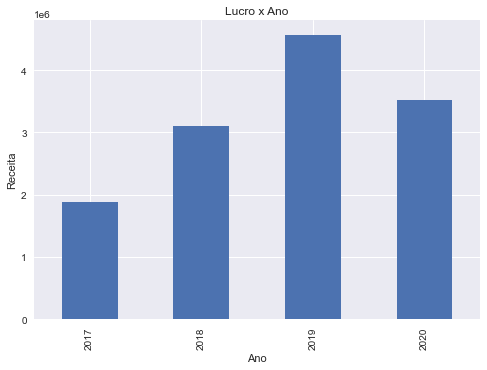

In [85]:
data_pedido_s = dfnew['Data-Pedido'].dt.year
#sns.barplot(x=data_pedido_s, 
#    y='Lucro',
#    hue= "Grupo", 
#    data=dfnew, ci=None )
#plt.ylabel("Total de Vendas em milhares de dolares", size=14)
#plt.xlabel("Education", size=14)
#plt.title("Grouped Barplot: Gender Bias in Salary", size=18)
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
dfnew.groupby(data_pedido_s)['Lucro'].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [86]:
dfnew.groupby(data_pedido_s)['Lucro'].sum()

Data-Pedido
2017    1.885180e+06
2018    3.098078e+06
2019    4.572944e+06
2020    3.522671e+06
Name: Lucro, dtype: float64

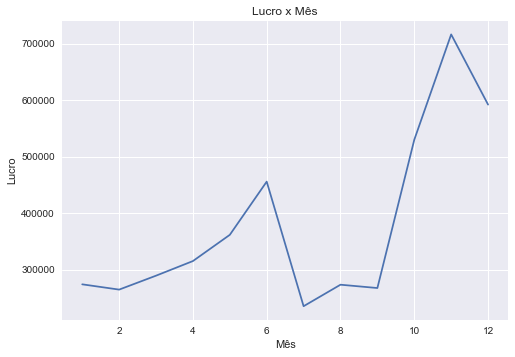

In [87]:
df_2009 = dfnew[dfnew['Data-Pedido'].dt.year == 2019]
df_2009.groupby(df_2009['Data-Pedido'].dt.month)['Lucro'].sum().plot(title="Lucro x Mês")
plt.xlabel('Mês')
plt.ylabel('Lucro');

In [88]:
for col in dfnew.columns:
    print(col)
    
# TODO: reorder this  ordereddict

Data-Pedido
Data-Entrega
Data-Envio
Qtd. da Ordem
Preço Unitário
Preço Total/Extendido
Porcentagem de desconto de preço unitário
Custo Padrão do Produto
Custo Total do Produto
Total de vendas
Revendedor
Cidade-Venda
Estado-Venda
Pais-Venda
Canal de Venda
Cliente
Cidade-Venda
Estado-Venda
Pais-Venda
Produto
Cor
Preço Listado
Modelo
Sub-Categoria
Categoria
Regional
Setor
Grupo
Tempo Envio /Logística
Tempo Envio/Preparação
Tempo Envio/Total
Lucro


In [89]:
print(dfnew.dtypes)

Data-Pedido                                  datetime64[ns]
Data-Entrega                                 datetime64[ns]
Data-Envio                                   datetime64[ns]
Qtd. da Ordem                                         int64
Preço Unitário                                      float64
Preço Total/Extendido                               float64
Porcentagem de desconto de preço unitário             int64
Custo Padrão do Produto                             float64
Custo Total do Produto                              float64
Total de vendas                                     float64
Revendedor                                           object
Cidade-Venda                                         object
Estado-Venda                                         object
Pais-Venda                                           object
Canal de Venda                                       object
Cliente                                              object
Cidade-Venda                            

In [90]:
dfnew.isnull().sum()

Data-Pedido                                      0
Data-Entrega                                     0
Data-Envio                                    2113
Qtd. da Ordem                                    0
Preço Unitário                                   0
Preço Total/Extendido                            0
Porcentagem de desconto de preço unitário        0
Custo Padrão do Produto                          0
Custo Total do Produto                           0
Total de vendas                                  0
Revendedor                                       0
Cidade-Venda                                     0
Estado-Venda                                     0
Pais-Venda                                       0
Canal de Venda                                   0
Cliente                                          0
Cidade-Venda                                     0
Estado-Venda                                     0
Pais-Venda                                       0
Produto                        

In [91]:
dfnew  = dfnew[['Produto','Qtd. da Ordem','Data-Pedido', 'Data-Entrega','Data-Envio', 'Tempo Envio/Total', 'Preço Unitário', 
'Preço Total/Extendido','Porcentagem de desconto de preço unitário','Custo Padrão do Produto','Custo Total do Produto',
'Total de vendas','Lucro','Revendedor','Cidade-Venda','Estado-Venda','Pais-Venda','Canal de Venda','Cliente','Cidade-Venda',
'Estado-Venda','Pais-Venda','Cor','Preço Listado','Modelo','Sub-Categoria','Categoria','Regional','Setor','Grupo']]
dfnew.head(2)

,Produto,Qtd. da Ordem,Data-Pedido,Data-Entrega,Data-Envio,Tempo Envio/Total,Preço Unitário,Preço Total/Extendido,Porcentagem de desconto de preço unitário,Custo Padrão do Produto,...,Pais-Venda,Pais-Venda,Cor,Preço Listado,Modelo,Sub-Categoria,Categoria,Regional,Setor,Grupo
0,"Mountain-100 Black, 42",1,2017-07-02,2017-07-12,2017-07-09,10,2024.994,2024.994,0,1898.0944,...,United States,[Not Applicable],Black,3374.99,Mountain-100,Mountain Bikes,Bikes,Southeast,United States,North America
1,"Mountain-100 Black, 42",2,2018-01-19,2018-01-29,2018-01-26,10,2024.994,4049.988,0,1898.0944,...,United States,[Not Applicable],Black,3374.99,Mountain-100,Mountain Bikes,Bikes,Southeast,United States,North America


In [92]:
dfnew[ 'Tempo Envio/Total'].describe()

count    121253.0
mean         10.0
std           0.0
min          10.0
25%          10.0
50%          10.0
75%          10.0
max          10.0
Name: Tempo Envio/Total, dtype: float64

In [93]:
dfnew.to_csv('df_vendas_novo.csv', index=False)